# **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('pastel')

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df =  pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
df.drop(['RowNumber','CustomerId',"Surname"],axis=1,inplace=True)

In [6]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# **EDA**

In [7]:
df.info(),df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


(None, 0)

**No null or Duplicate Values in dataset**

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Visualizations**

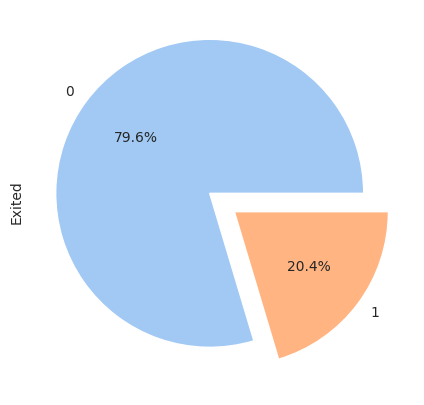

In [9]:
#Target Distribution
plt.figure(figsize=(5,5))
explode = [0.1, 0.1]
df.groupby('Exited')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%");

In [10]:
feature_list = [feature for feature in df.columns if not feature  == "Exited"]

numerical_features =  list(df._get_numeric_data().columns)
categorical_features = list(df.drop(numerical_features,axis=1).columns)
discrete_features = ['HasCrCard', 'IsActiveMember','NumOfProducts']
continuous_features = list(set(numerical_features) - set(discrete_features))

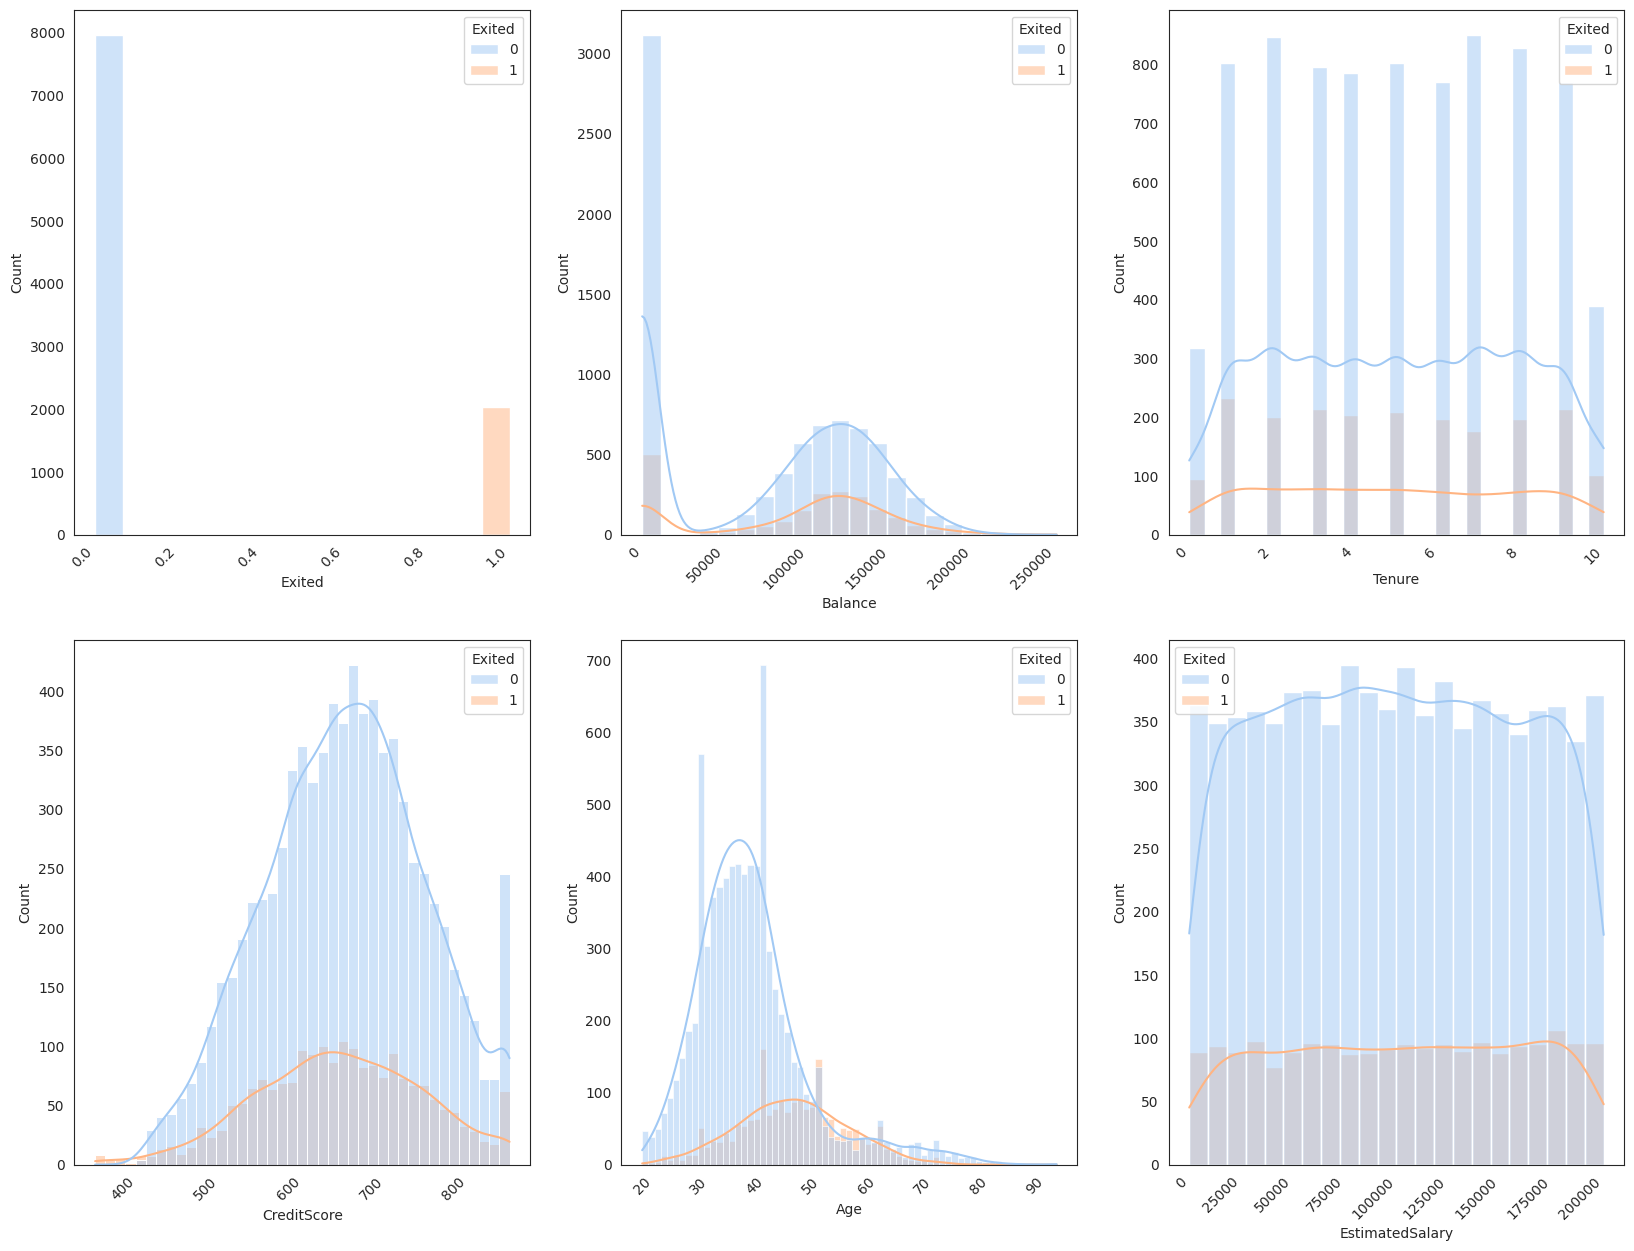

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20,15))
for var, subplot in zip(continuous_features, ax.flatten()):
    sns.histplot(x=var,  data=df, ax=subplot, hue='Exited',kde=True)
    subplot.set_xticklabels(subplot.get_xticklabels(),rotation=45, ha='right')

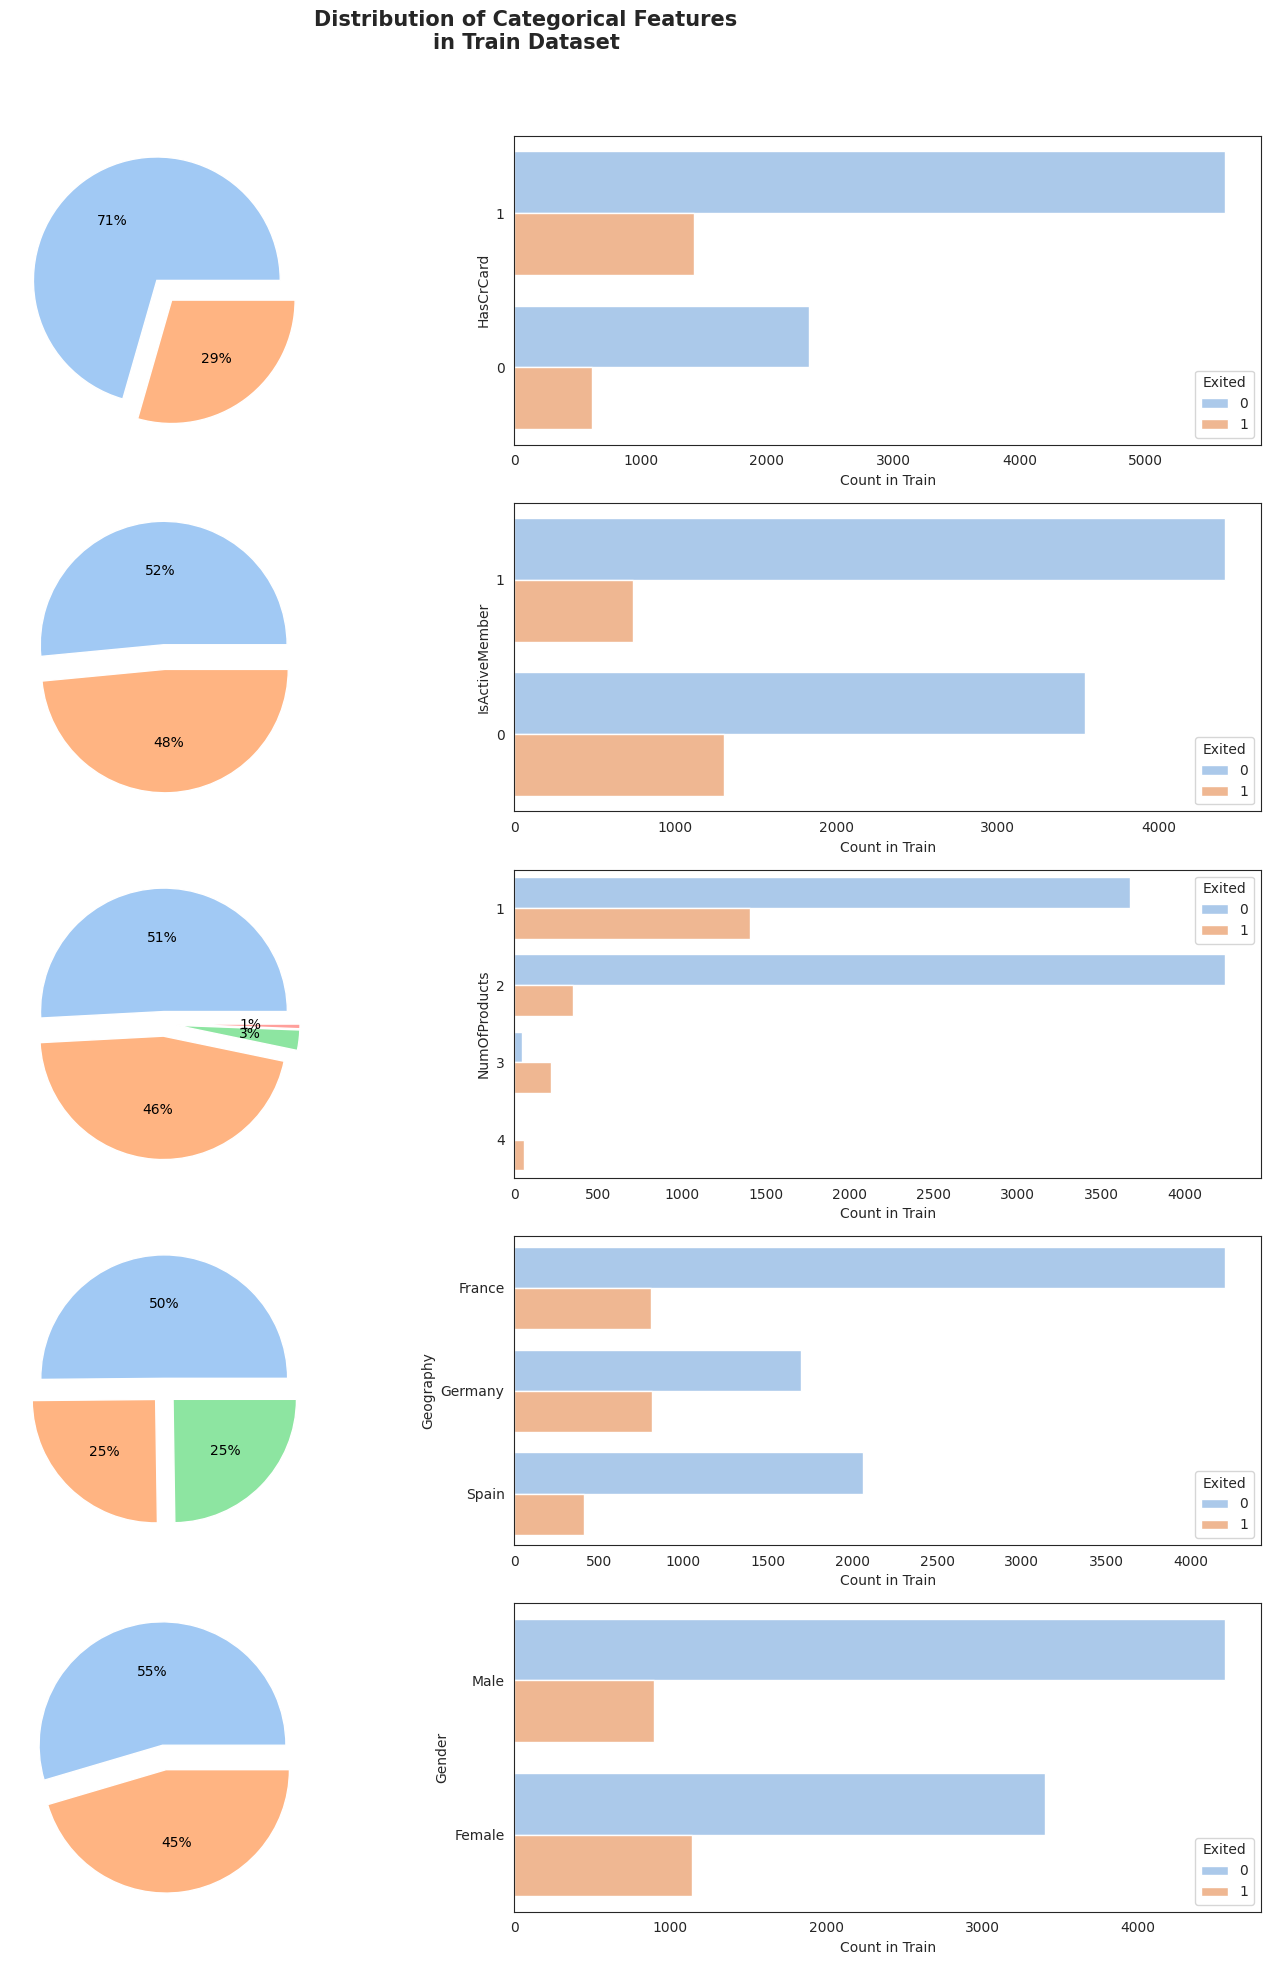

In [12]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

for i, column in enumerate(discrete_features + categorical_features):

    ax[i][0].pie(
        df[column].value_counts(),
        shadow=False,
        explode=[.1 for i in range(df[column].nunique())],
        autopct='%1.f%%',
        textprops={'color': 'black'},
    )

    sns.countplot(data=df, y=column, ax=ax[i][1], order=df[column].value_counts(
    ).index, hue=df['Exited'])
    ax[i][1].set_xlabel('Count in Train')
    ax[i][1].set_ylabel(f'{column}')

fig.suptitle('Distribution of Categorical Features\nin Train Dataset\n\n\n\n',fontweight='bold',fontsize=15)
fig.tight_layout()
plt.show()

from the graph we can say that:<br>
* **People from Germany are more likely to exit**
* **Females are more likely to exit**
* **People with less number of products more likely to churn**
* **Nonactive members are more prone to churn**

<Axes: >

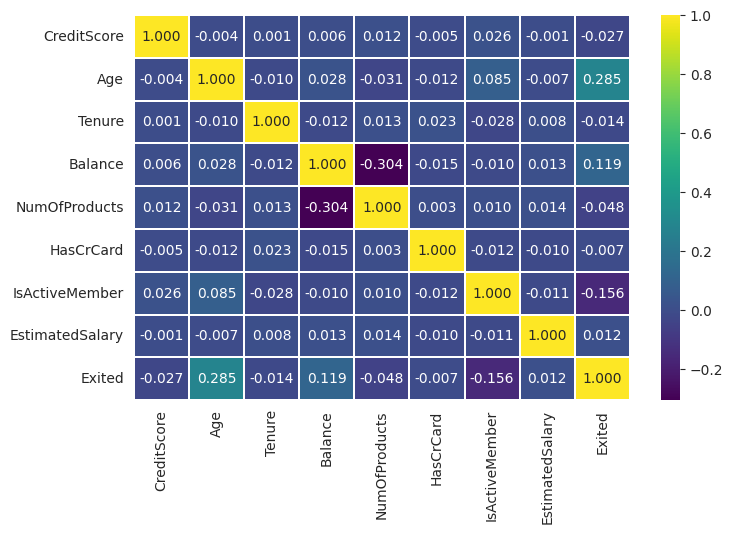

In [13]:
plt.figure(figsize = (8, 5),dpi=100)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis',linewidths=0.2,fmt='.3f')

**Age, Balance and Isactivemember are the most contributing factors to whether exited or not**

# **Normalizing Data**
i.e. converting data into the range of 0 to 1

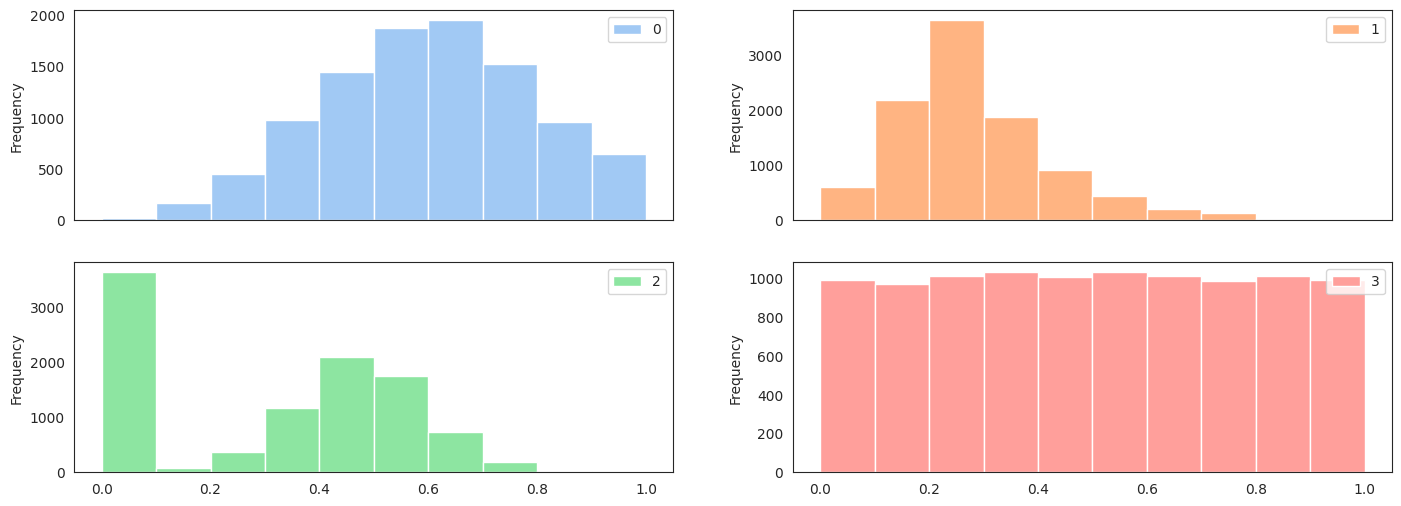

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

pd.DataFrame(scaler.fit_transform(df[['CreditScore','Age','Balance','EstimatedSalary']])).plot(kind='hist',subplots=True,layout=(2,2),figsize=(17,6))
plt.show()

In [15]:
df_transformed = df.copy()
df_transformed[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

In [16]:
df_transformed.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,5.012800,0.304848,1.530200,0.70550,0.515100,0.500441,0.203700
std,0.193307,0.141727,2.892174,0.248696,0.581654,0.45584,0.499797,0.287580,0.402769
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,3.000000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000
50%,0.604000,0.256757,5.000000,0.387402,1.000000,1.00000,1.000000,0.500960,0.000000
75%,0.736000,0.351351,7.000000,0.508749,2.000000,1.00000,1.000000,0.746955,0.000000
max,1.000000,1.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000


# **Splitting the data**

In [17]:
df_transformed.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709,0


In [18]:
X = df_transformed.drop('Exited',axis=1)
y = df_transformed['Exited']

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)
X.drop(columns=["Geography","Gender"],inplace=True)
X = pd.concat([X,geography,gender],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [21]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [22]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [23]:
X_train.shape,y_train.shape

((8000, 11), (8000,))

# **Training Model And Validating**

Accuracy:  0.8125
Precision:  0.5681818181818182


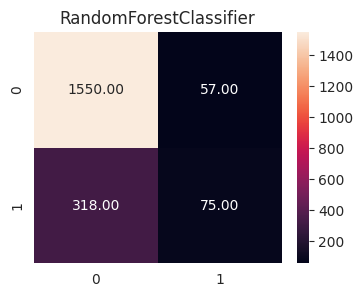

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,accuracy_score
lr = LogisticRegression(solver="saga",tol=0.001)

lr.fit(X_train,y_train)
print("Accuracy: ",lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print("Precision: ",precision_score(y_test,y_pred))
cnf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
plt.title("RandomForestClassifier")
sns.heatmap(cnf,annot=True,fmt=".2f")
plt.show()

**Accuracy is 81 percent but precision is low,<br>Hence we can try Ensemble Techniques**

Accuracy:  0.8665
Precision:  0.7581967213114754


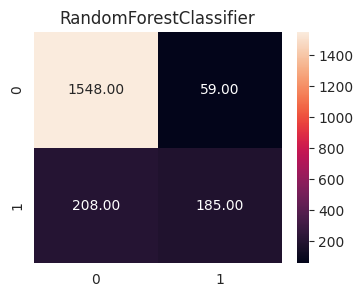

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
print("Accuracy: ",rf.score(X_test,y_test))
y_pred = rf.predict(X_test)
print("Precision: ",precision_score(y_test,y_pred))
cnf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
plt.title("RandomForestClassifier")
sns.heatmap(cnf,annot=True,fmt=".2f")
plt.show()

**For RandomForest accuracy and precision is ok, hence we can use this model. it is not perfect as it misclassifies many values**

**Also Tried DescisionTreeClassifier but it also has a low precision of 0.454**

Accuracy:  0.8675
Precision:  0.75


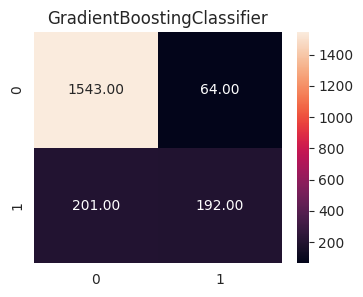

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print("Accuracy: ",gb.score(X_test,y_test))
y_pred = gb.predict(X_test)
print("Precision: ",precision_score(y_test,y_pred))
cnf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
plt.title("GradientBoostingClassifier")
sns.heatmap(cnf,annot=True,fmt=".2f")
plt.show()

Precision:  0.7137809187279152


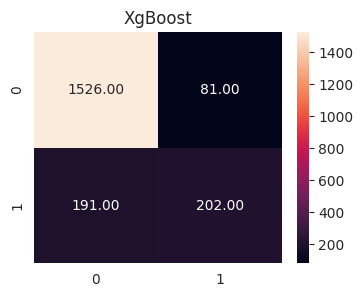

In [27]:
import xgboost as xgb
model = xgb.XGBClassifier()
# Train the model on the training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precision: ",precision_score(y_test,y_pred))
cnf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
plt.title("XgBoost")
sns.heatmap(cnf,annot=True,fmt=".2f")
plt.show()